In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=3))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


In [6]:
# TODO: Total number of records
n_records = len(data.index)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(filter(lambda x:x==">50K", data['income']))

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(filter(lambda x:x=="<=50K", data['income']))

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/float(n_records))*100
lesser_percent = (n_at_most_50k/float(n_records))*100

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)
print "Percentage of individuals making atmost $50,000: {:.2f}%".format(lesser_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%
Percentage of individuals making atmost $50,000: 75.22%


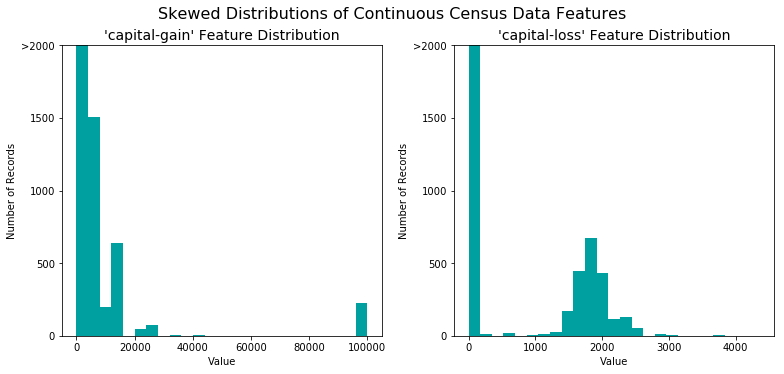

In [7]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

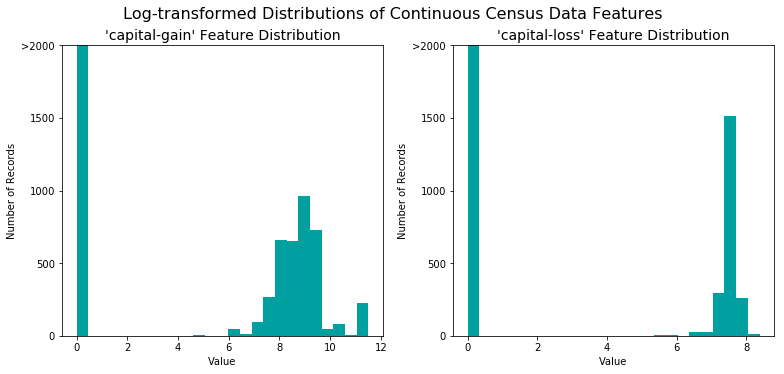

In [8]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

In [10]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 3))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States


In [12]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values1
income = income_raw.map({'>50K': 1, '<=50K': 0})

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
print encoded
print income_raw[1:9]
print income[1:9]

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

In [14]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


In [9]:
# TODO: Calculate accuracy
accuracy = n_greater_50k/float(n_records)

# TODO: Calculate F-score using the formula above for beta = 0.5
beta = 0.5
beta_2 = beta*beta
recall = 1 #(True Positives)/(True Positives + False Negatives) And it is said that data is pure and no missing data. False negavtives considered to be zero.
fscore = (1+beta_2)*(accuracy*recall)/((accuracy*beta_2)+recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


Here F-score and Accuracy score are nearly equal. As we have considered Beta = 0.5, which indicates that emphais is laid towards the precision i.e. accuracy. 

Q) List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Though all those supervised learning models can be applied on this problem, I prefer to use Guassian Naive Bayes, Decision Trees and Support Vector Machines (SVM).

1) Gaussian Naive Bayes: 
- Describe one real-world application in industry where the model can be applied. (You may need to do research for this — give references!)

    Ans) Guasssian NB, can be used in Document Classification. This algorithm helps us to determine whether a particular document belongs to one or more classified categories. Some of the features used in this application is presence and absence of some keywords. Or Presence of scientific terminology or literature or other language patterns.
    Ref 1) http://www.cs.ucf.edu/~gqi/CAP5610/CAP5610Lecture04.pdf
    Ref 2) https://www.quora.com/In-what-real-world-applications-is-Naive-Bayes-classifier-used
    Ref 3) http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
    
    
- What are the strengths of the model; when does it perform well?

    Ans) It is simple when the features used for classifying are independent to each other. This in turn helps in efficiently training the data well on the model. Though there is dependency between some features, this model performs well. when maximum likelihoodness of labels is taken into consideration. The decoupling of the class conditional feature distributions helps in alleviating problems stemming from the curse of dimensionality.
    
    
- What are the weaknesses of the model; when does it perform poorly?

    Ans) It is prone to high bias when limited amount of data is available to model. Possibility of bad generalizations. When unknown feature-label combinations comes into picture, this could result in incorrect outputs.Although it is a decent classifier, it is known to be a bad estimator.
    
    
- What makes this model a good candidate for the problem, given what you know about the data?

    Ans) This model gives us the desired results when we have adequate data and many (adequate) features. This could be a decently perfect model to train data when considered the graphical illustrations shown below the data modelling for 100% of training, Gaussian NB has taken minimum time.  
    
2) Decision Trees:

- Describe one real-world application in industry where the model can be applied. (You may need to do research for this — give references!)

    Ans) Decision Trees can be used in astronomical applications. Decision Trees are used used to filter the noise from Hubble Space Telescope images. Many decision trees are used but notable C4.5 and CART were used. As these models prefer axis-parallel hyperplanes. 
    Ref 1) http://www.cbcb.umd.edu/~salzberg/docs/murthy_thesis/survey/node32.html
    Ref 2) http://adsabs.harvard.edu/full/1995PASP..107..279S
    Ref 3) http://scikit-learn.org/stable/modules/tree.html
    
       
- What are the strengths of the model; when does it perform well?

    Ans) Decision Trees are easy to visualise and interpret. Faster in execution while working on training data. Non linear relationship between paramters do not affect the tree performance. Decision Trees implicitly perform variable screening or feature selection. Model performs well when it has smaller decison trees rather than bigger decsion trees. Possible to validate a model using statistical tests which depicts the reliability of the model. Performs well though assumptions are somewhat violated by the true model from which the data were generated. Can handle multi-output problems.
    
    
- What are the weaknesses of the model; when does it perform poorly? 

    Ans) The ID3 Algorthim which was explained in the course depicts that decision trees can be prone to overfitting. Decision trees grow very rapidly which in turn uses high memory. Decision trees can be unstable because small variations in the data may result in a completely different tree. Decision tree learners create biased trees if some classes dominate.
    
    
- What makes this model a good candidate for the problem, given what you know about the data?

    Ans) Previously, we have used one hot encoding technique. As it suites for the decison trees as the interpretation and visualisation are great on this data. From below graphical illustrations, Accuracy score and the F1 score are relatively higher than the other models used on the training data. But not on the testing sets. This shows that there is an possible overfitting occured in model construction. It is easy to train data on the model.
    
    
3) Support Vector Machine (SVM):

- Describe one real-world application in industry where the model can be applied. (You may need to do research for this — give references!)

    Ans) SVM's are widely used in Biomedical industry and other sciences. SVM's are used to classify Protiens from compound materials. SVM's are senistive to noise. Posthoc interpretation of SVM models for identifying features used to make predictions in material research of the biological sciences.
    Ref 1) https://en.wikipedia.org/wiki/Support_vector_machine#Applications
    Ref 2) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4105825/
    Ref 3) http://scikit-learn.org/stable/modules/svm.html#svm-classification
    
    
- What are the strengths of the model; when does it perform well?

    Ans) SVM's performs well when there is a clear distinction between the classes. The model has faster speeds while training the data. The regularisation parameter makes the user think about avoiding over-fitting. The kernel trick helps in building the domain knowledge about the problem via engineering the kernel (Though kernel method not just unique to SVM). SVM maximizes margin, so the model is slightly more robust (compared to linear regression). Supports feature sensitive data. Effective in high dimensional spaces. Also effective where number of dimensions is greater than the number of samples. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
    
    
- What are the weaknesses of the model; when does it perform poorly?

    Ans) When classification issue is not binary, SVM's behave poorly. Do not always consider all the data equally. Sometimes unclear choice in Kernal. Performs slow while handling data into the model. SVM moves the problem of over-fitting from optimising the parameters to model selection. Kernel models can be quite sensitive to over-fitting the model selection criterion. The hinge loss used in the SVM results in sparsity. If the number of features is much greater than the number of samples, the method is likely to give poor performances. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation
    
    
- What makes this model a good candidate for the problem, given what you know about the data?
    
    Ans) From below graphical illustrations though SVM's considerably need more time to train data on the models. It gives the best results on the test data set. This proves to be model a good candidate for the problem. As it has generated more efficient results than others. If training time is not a consideration, this is a best bet. 




In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(predictions_train,y_train[:300])
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(predictions_test,y_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

LinearSVC trained on 361 samples.
LinearSVC trained on 3617 samples.
LinearSVC trained on 36177 samples.
GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.


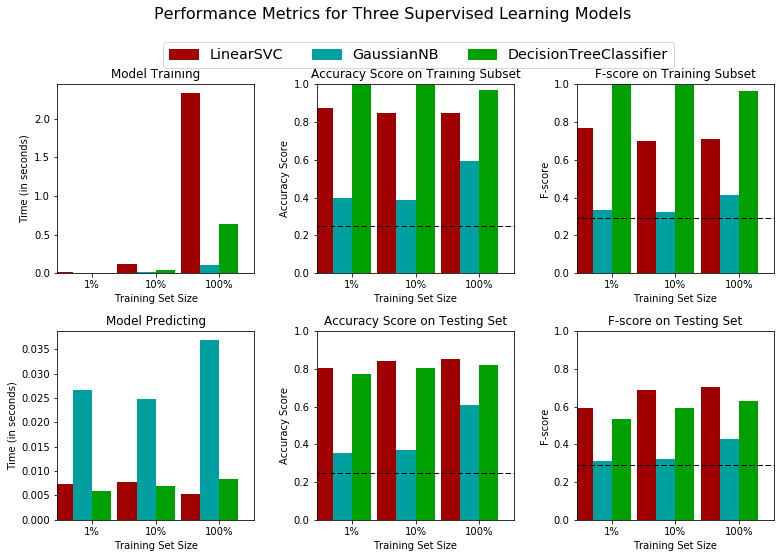

In [11]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the three models
clf_A = LinearSVC(random_state=101)
clf_B = GaussianNB()
clf_C = DecisionTreeClassifier(random_state=0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(len(X_train) * 0.01)
samples_10 = int(len(X_train) * 0.1)
samples_100 = int(len(X_train) *1.0)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

Q3 ) Based on the evaluation you performed earlier, in one to two paragraphs, explain to CharityML which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.
Hint: Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

- End of the day, we do prefer a model gives us the best results. Considering the accuracy and f score on the traing sets. The gaussian NB, Decision Trees and SVM's are the in order of good, better and best for a choice of model to be recommended for CharityML. When considered the same scores on training set decision tree performs very well but the same algorithm didn't perform well on test data. This is due to the possibility of occurance of overfitting while training. Decision Trees take considerable lesser time to process the data when compared to SVM's. Interestingly out of these 3 models, Gaussian NB takes very little time for model training. This is due to its simple structure in design. And yet Guassian NB delivered poor results finally.(Accuracy and F Scores). I do not recommend Gaussian NB model for CharityML, though it has less computational cost.


- For practical feasibility, based on the accuracy score and F score on testing data sets (>= 0.5). Both the Decision Trees and SVM's can be used. If charityML is very concerned about the time taken for Model Training and Model Predicting, and agreed for smaller tradeoffs in FINAL Results. The final results are nearly equal but model training time for SVM's is nearly 2.5 times greater than model training time for Decision Trees. The model prediction time for SVM's is nearly 16 times greater than model prediction time of Decision Trees. It can choose Decision Trees model. (Though small amount of overfitting occured in Decision Trees, if CharityML is convinient with the "better" perfomance and "good" results.)


- If CharityML is ONLY concerned about final results. If it doesn't bother about the model training time and model prediction time. Based the final accuracy and f score values SVM's have the best results. So CharityML can choose SVM's as their appropiate model for their task. SVM model have given us the best results compared to the other two. 

Q4 ) In one to two paragraphs, explain to CharityML, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.

- SVM is choosen as the final model. Consider a scenario where we have data that must be classified into two different groups. If the data are linearly separable (divided by a simple straight line) it can be separated completely into groups by a dividing hyperplane. Margin is a diving plane. But real-life datasets do not normally allow themselves to be divided so easily. It is an hurdle while dealing with non-linear data. There are two ways to deal with non linear seperabel datasets and move beyond hard-margin SVM's. If the data is seperable in non linear fashion we consider using KERNEL functions (advanced mechanism) that are able to nonlinear dividing curve between the classes. We make considerations of both kernel functions and the value of soft-margin parameter to perform such classification tasks. To optimise we use regularlisation parameters which are like weights we put on the errors. With smaller parameter values, we punish less the error and results in increasing size of margins. With higher parameter values, this results in narrower margins as this punishes the error severely. 


- Kernel functions capture the nonlinear dividing curve, it represents the domain knowledge of data and similarities in the data. Using these functions data is projected onto a transformed space where a dividing plane can be found. The tasks for SVM usually lie in binary classification. 


- SVM's basically work on PASS or FAIL condition for an instance an switch accordingly. Based on those decisions made a boundary is established to segregate the data-points used. Domain knowledge about the data is used to establish a relationship between the data. The objective of the SVM algorithm is to find the line or boundary with the maximum margin and select that over a sub-optimal boundary. By maximising the margin, we make the model as 'safe' as possible from error i.e. reduce PASS cases being mixed with fail and vice versa. Kernel transforms data points into a new dimension so that they can be seperable. Even the complex structure can be easily seperable by either a linear or non-linear boundary. Once the boundary has been established, the model can use it to predict whether a case is PASS or FAIL, depending on what side of the boundary a new data point is on.


In [12]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.svm import LinearSVC, SVC

# TODO: Initialize the classifier
clf = SVC(random_state=0)

# TODO: Create the parameters list you wish to tune
parameters = {'C':range(1,5),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,5)}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

/home/ravi/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/ravi/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Unoptimized model
------
Accuracy score on testing data: 0.8301
F-score on testing data: 0.6592

Optimized Model
------
Final accuracy score on the testing data: 0.8474
Final F-score on the testing data: 0.6996


Q5) What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in Question 1?
Note: Fill in the table below with your results, and then provide discussion in the Answer box.

- Ans) 

Results:

Metric --	Benchmark Predictor ||  Unoptimized Model  ||	Optimized Model

Accuracy Score --	0.2478 	  ||       0.8301      ||       0.8474

F-score --	0.2917 	     ||        0.6592     ||        0.6996

- When compared the accuracy, the Optimized model's accuracy is increased by 0.0173, i.e. 1.72% compared to unoptimized model. This shows that data has fit better in the optimized model. Though this improvement is very little. It is mediocre development, as this Gridsearch has taken around 5 hours to complete. Compared Benchmark predictor its not a big increment with respect to the computational time. 

- When compared the F score, the Optimized model's accuracy is increased by 0.0404, i.e. 4.04% compared to unoptimized model. This shows decent improvement in precision and recall. Compared Benchmark predictor its not a big increment. Given the improvement in F Score which depicts the advantage of optimizing the model. I would recommend CharityML to perform grid searches and tuning, to obtain a best classifier with possible better parameters to choose.  

- When comparing between the optmized and unoptimized models, the optimized model performs slightly better.




In [2]:
# show best parameters
#print "\nBest Classifier\n------"
#print best_clf


Q6) When Exploring the Data, it was shown there are thirteen available features for each individual on record in the census data.
Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?


- Ans) Of all the available features, the five features I prefer them are (Highest Order) as follows - Age, Education, Marital Status, Capital-Gain and Occupation.
- Age : Older people prefer to donate more for charities. The higher the age is probability of donation (if person has decent income) increases.
- Education : Higher the education increases the chances of individuals to have highly paid jobs. If the income levels are high, people may tend to donate.
- Marital Status: People who are divorced, widowed or single tend to donate more than others.
- Capital-Gains: The people who pay higher capital gains indicates that they are financially strong and they are well to do. The chances of donations are higher in this section of people. 
- Occupation: People who work private firms usually paid morethan the people who work for government agencies. And in private firms, people who work in IT, Financial, etc.. industries are often paid high. As they high earning group, chances of donations from this group are higher. If we can segregate people according to the industries, we can locate high earning group and request for donations. 


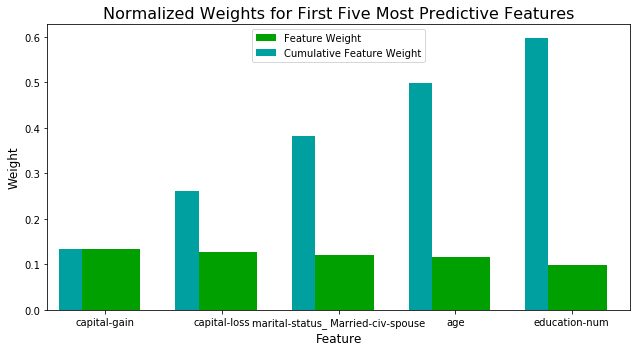

In [16]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier
# TODO: Train the supervised model on the training set 
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

Q7 ) How do these five features compare to the five features you discussed in Question 6? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?


- Ans) Surprisingly 4 of 5 features I have expected are present in this. Age, Education and Marital status are top 3 as I have expected. I have expected capital gain as 4th higher priority. Here it is 5th highest priority. One exception is Capital loss. I didn't expect this previously. But this is also very important. As people who have severe captial losses indicates that those people are financially very weak. You cannot expect them to donate them though their income levels are higher. We need to consider the people with lower capital losses. 

- The algorithm depicts that few features have higher weights as their data probably contains better indicators of income level of the people which aids the algorithm in defining a stronger and more accurate decision boundary. The trained model gives good scores and quantative weights of feature importances.

In [17]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8474
F-score on testing data: 0.6996

Final Model trained on reduced data
------
Accuracy on testing data: 0.8367
F-score on testing data: 0.6742


Q8 ) How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
If training time was a factor, would you consider using the reduced data as your training set?


- Ans) As believed, by reducing the number of features (only Top 5) or data has some bad impact upon our model. The reduced model has dropped in accuracy by around 1.1%, and the F-Score has dropped by around 2.5% compared to the optimized model. I believe this is due to the classifier not being able to accurately capture the complexity of the data and therefore not being able to properly generalize. 


- Interestingly, those values of reduced data model are better than the unoptimized model (0.8301 and 0.6592 respectively), which is impressive. As the choosen model is SVM, the training time is very "BIG" consideration, the reduced data can be used while building a model is to be considered. If tradeoffs are acceptable for low possible losses with relief from very large training time. I would recommend CharityML approach to consider even this reduced feature approach with choosing most prominent features used in the data.